In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set the path to save results in Google Drive
results_path = '/content/drive/My Drive/ACE6233_Assignment/Task1/'

# Create the directory if it doesn't exist
if not os.path.exists(results_path):
    os.makedirs(results_path)

# Load the dataset
url = "https://raw.githubusercontent.com/wooihaw/datasets/main/shopping_data.csv"
df = pd.read_csv(url)

# Preview the first five rows of the dataset
print("First five rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
First five rows of the dataset:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Missing values in the dataset:
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


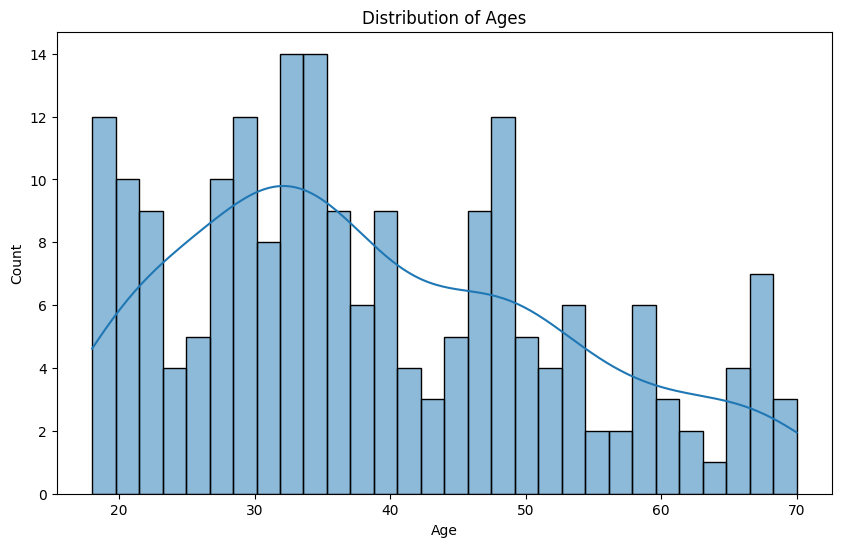

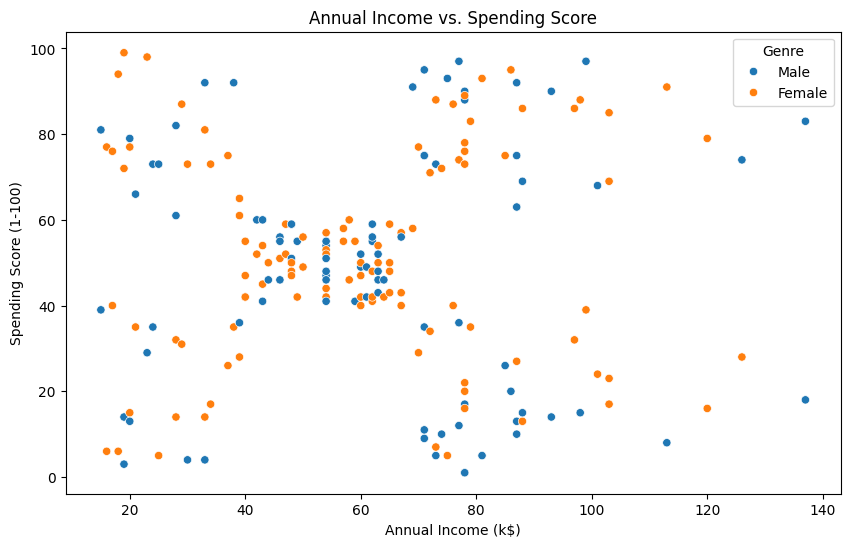

In [ ]:
# Visualize the distribution of ages
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Ages')
plt.savefig(results_path + 'age_distribution.png')
plt.show()

# Visualize the relationship between Annual Income and Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Genre', data=df)
plt.title('Annual Income vs. Spending Score')
plt.savefig(results_path + 'income_vs_spending.png')
plt.show()

In [ ]:
# Store only columns 2 to 4 into X and apply StandardScaler() to scale X
X = df.iloc[:, 2:5]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

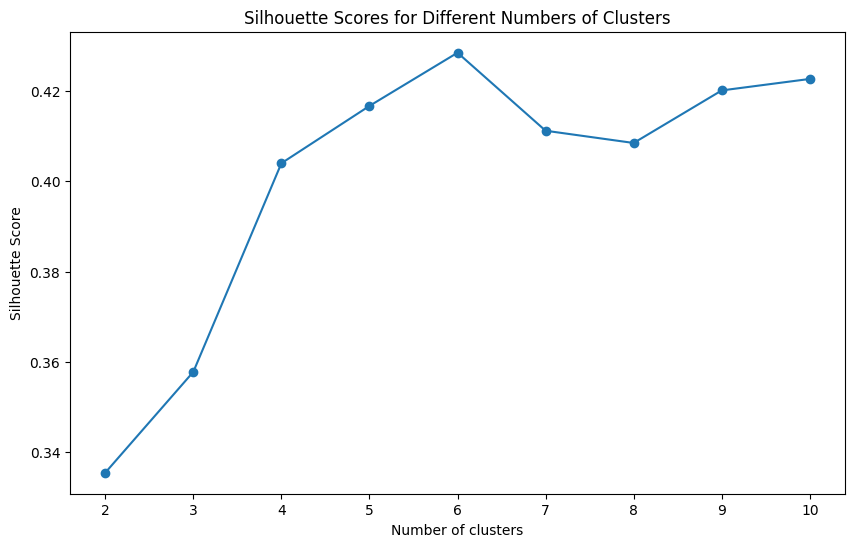

Optimal number of clusters: 6


In [ ]:
# Use the Silhouette Score method on the scaled X to find the optimal number of clusters (between 2 and 10)
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.savefig(results_path + 'silhouette_scores.png')
plt.show()

# Determine the optimal number of clusters
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
print("Optimal number of clusters:", optimal_clusters)

In [ ]:
# Use the optimal number of clusters to fit k-Means clustering to the scaled X
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_scaled)
y = kmeans.labels_

# Store the labels assigned by k-Means clustering into y
df['Cluster'] = y

# Save the clustered data to a CSV file
df.to_csv(results_path + 'clustered_data.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, mean_squared_error, r2_score

# Validate the performance of a Logistic Regression model using 5-fold cross-validation
log_reg = LogisticRegression(random_state=42)
scores = cross_val_score(log_reg, X_scaled, y, cv=5, scoring='accuracy')
log_reg.fit(X_scaled, y)
y_pred = log_reg.predict(X_scaled)

# Calculate performance metrics
accuracy = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred, average='weighted')
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)

# Save the cross-validation scores and performance metrics
with open(results_path + 'performance_metrics.txt', 'w') as f:
    f.write("Optimal number of clusters: {}\n".format(optimal_clusters))
    f.write("Accuracy scores from 5-fold cross-validation: {}\n".format(scores))
    f.write("Mean accuracy: {}\n".format(scores.mean()))
    f.write("\nPerformance Metrics:\n")
    f.write("Accuracy: {}\n".format(accuracy))
    f.write("F1 Score: {}\n".format(f1))
    f.write("Precision: {}\n".format(precision))
    f.write("Recall: {}\n".format(recall))
    f.write("Mean Squared Error: {}\n".format(mse))
    f.write("R-Squared: {}\n".format(r2))
    f.write("Confusion Matrix:\n{}\n".format(conf_matrix))

print("\nPerformance Metrics:")
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Mean Squared Error:", mse)
print("R-Squared:", r2)
print("Confusion Matrix:\n", conf_matrix)


Performance Metrics:
Accuracy: 0.995
F1 Score: 0.9949991780371527
Precision: 0.995125
Recall: 0.995
Mean Squared Error: 0.005
R-Squared: 0.9979227038087226
Confusion Matrix:
 [[23  0  0  0  0  0]
 [ 0 45  0  0  0  0]
 [ 0  0 33  0  0  0]
 [ 0  0  0 38  1  0]
 [ 0  0  0  0 39  0]
 [ 0  0  0  0  0 21]]
